In [2]:
import os
import numpy as np

from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# Declare variables
NEEDLE = './pictures/needle.png'
GAUGE = './pictures/gauge.png'

## Synthetic Images - Correct Needle placement
* Determine what angle the needle needs to be set to in order to display at the 0 gauge number.
* Deter what angle the needle needs to be set to in order to display the 15 gauge reading.
* Iterate over the range between the 0 angle and the 15 angle
* Create the image with the labels in PSI instead of degrees.

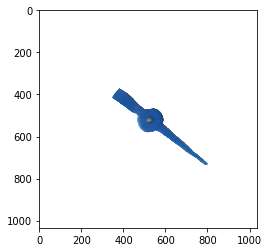

In [4]:
# Modify the image to set the needle at 0 degrees
image = Image.open(NEEDLE).convert('RGBA')
image_rot_90 = image.rotate(232, expand=False, resample=Image.BICUBIC)
# image_rot_90.save('needle_rot_0.png')
plt.imshow(image_rot_90)

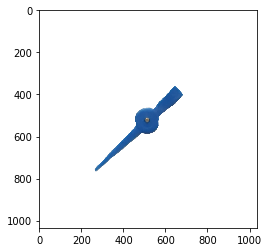

In [6]:
image_rot_134 = image.rotate(134, expand=False, resample=Image.BICUBIC)
plt.imshow(image_rot_134)

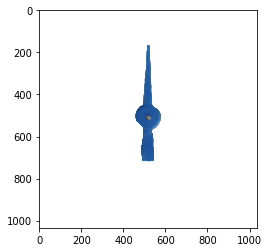

In [7]:
image_rot_360 = image.rotate(360, expand=False, resample=Image.BICUBIC)
plt.imshow(image_rot_360)

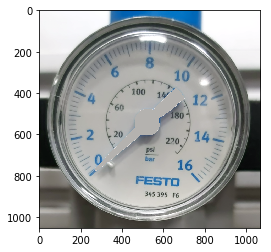

In [8]:
# Gauge background
image = Image.open(GAUGE).convert('RGBA')
plt.imshow(image)

### Needle image manipulation and rotation

In [9]:
# Rotate all the images of needles 360 degrees
PATH = "./pictures/needles/needle_rot_{0}.png"
def make_needles(angle):
    img = Image.open('/media/dev/Data1/transfer/IITDFSM/deep-gauge/Needle_rot_0.png')
    x = img.rotate(-angle, expand=True, resample=Image.BICUBIC)
    # crop the rotated image to the size of the original image
    x = x.crop(box=(x.size[0]/2 - img.size[0]/2,
               x.size[1]/2 - img.size[1]/2,
               x.size[0]/2 + img.size[0]/2,
               x.size[1]/2 + img.size[1]/2))
    
    filename = PATH.format(angle)

    x.save(filename)

for angle in range(0, 361):
    make_needles(angle)

### Individual folder structure for Tensorflow training

In [10]:
# Create the folders for each of the gauge classes
PATH = './pictures/tf_gauges/psi_{0}'

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

m = range(0, 16)
n = range(1, 10)
o = range(5, 10)

for idx, i in enumerate(m):
    createFolder(PATH.format(i))
    
    # the gauge stops at 15
    if(i != 15):
        # loop through 0.5 - 1
        for kdx, k in enumerate(o):
            pre_one = "{0}-{1}".format(i,k)
            createFolder(PATH.format(pre_one))
        
    # loop through 1 - 15
    if(i >= 1 and i < 15):
        whole = "{0}".format(i)
        createFolder(PATH.format(whole))
        
        # Loop through #.1 = #.9
        if(i != 15):
            for jdx, j in enumerate(n):
                decimal = "{0}-{1}".format(i,j)
                createFolder(PATH.format(decimal))

### Generate synthetic gauges and save for Tensorflow training

In [12]:
NEEDLES_PATH = "./pictures/needles/needle_rot_{0}.png"
TF_GAUGES = "./pictures/tf_gauges/psi_{0}"
EDA_GAUGES = "./pictures/gauges/{0}"

def save_gauge(item, num):
    img_gauge = Image.open(GAUGE, 'r')

    filename = NEEDLES_PATH.format(item)
    img_needle = Image.open(filename, 'r')
    img_copy = img_gauge.copy()

    img_copy.paste(img_needle.convert('L'), (-28, -38), img_needle.convert('RGBA'))
    
    # Save the synthetic image to the class folder
    string_num = str(num)
    dash = string_num.replace(".","-")
    folder = TF_GAUGES.format(dash)

    # Save PNG for data Augmentation
    gauge_name = "{0}/gauge_0.png"
    filename_save = gauge_name.format(folder)
    img_copy.save(filename_save)

    # Save PNG for EDA
    eda_name = "gauge_{0}.png".format(dash)
    img_copy.save( EDA_GAUGES.format(eda_name) )

def iterate_gauge(mapping):
    for idx, item in enumerate(mapping):
        save_gauge(mapping[item], item)

In [13]:
# Define a mapping between degrees in circle and gauge readings
gaugeDegreeMap = {
    0:231, 0.5:233, 0.6:235, 0.7:237, 0.8:239, 0.9:241,
    1:243, 1.1:244, 1.2:246, 1.3:248, 1.4:249, 1.5:250, 1.6:253, 1.7:255, 1.8:257, 1.9:259,
    2:260, 2.1:262, 2.2:264, 2.3:266, 2.4:268, 2.5:270, 2.6:271, 2.7:273, 2.8:275, 2.9:277,
    3:279, 3.1:280, 3.2:282, 3.3:284, 3.4:286, 3.5:287, 3.6:290, 3.7:291, 3.8:293, 3.9:295,
    4:297, 4.1:299, 4.2:301, 4.3:302, 4.4:304, 4.5:306, 4.6:308, 4.7:310, 4.8:311, 4.9:313,
    5:315, 5.1:317, 5.2:319, 5.3:321, 5.4:323, 5.5:325, 5.6:327, 5.7:328, 5.8:330, 5.9:332,
    6:334, 6.1:336, 6.2:338, 6.3:339, 6.4:341, 6.5:343, 6.6:345, 6.7:347, 6.8:349, 6.9:350,
    7:352, 7.1:355, 7.2:357, 7.3:358, 7.4:360, 7.5:2, 7.6:4, 7.7:6, 7.8:7, 7.9:9,
    8:11, 8.1:13, 8.2:15, 8.3:16, 8.4:18, 8.5:21, 8.6:23, 8.7:24, 8.8:26, 8.9:28,
    9:30, 9.1:32, 9.2:33, 9.3:35, 9.4:37, 9.5:39, 9.6:41, 9.7:42, 9.8:44, 9.9:46,
    10:48, 10.1:50, 10.2:52, 10.3:53, 10.4:55, 10.5:57, 10.6:58, 10.7:60, 10.8:62, 10.9:64,
    11:66, 11.1:68, 11.2:69, 11.3:71, 11.4:73, 11.5:75, 11.6:76, 11.7:78, 11.8:80, 11.9:82,
    12:84, 12.1:85, 12.2:87, 12.3:89, 12.4:91, 12.5:92, 12.6:94, 12.7:96, 12.8:98, 12.9:99,
    13:101, 13.1:103, 13.2:105, 13.3:107, 13.4:108, 13.5:110, 13.6:112, 13.7:114, 13.8:115, 13.9:117,
    14:119, 14.1:121, 14.2:122, 14.3:124, 14.4:126, 14.5:127, 14.6:129, 14.7:131, 14.8:133, 14.9:135,
    15: 136
}

In [14]:
# Iterate through the lookup map
iterate_gauge(gaugeDegreeMap)